Importing Lib

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [5]:
df=pd.read_csv('cars_sampled.csv')

In [6]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


To check info about the data set

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [8]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


To convert more decimal no into small decimal

In [9]:
pd.set_option('display.float_format',lambda x : '%.3f' % x)

In [10]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


Display.max_colums wll show all the columns

In [11]:
pd.set_option('display.max_columns',500)
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


Droping Unwanted Values

In [12]:
df.drop(['postalCode','name','dateCrawled','dateCreated','lastSeen'],axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               50001 non-null  object
 1   offerType            50001 non-null  object
 2   price                50001 non-null  int64 
 3   abtest               50001 non-null  object
 4   vehicleType          44813 non-null  object
 5   yearOfRegistration   50001 non-null  int64 
 6   gearbox              47177 non-null  object
 7   powerPS              50001 non-null  int64 
 8   model                47243 non-null  object
 9   kilometer            50001 non-null  int64 
 10  monthOfRegistration  50001 non-null  int64 
 11  fuelType             45498 non-null  object
 12  brand                50001 non-null  object
 13  notRepairedDamage    40285 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.3+ MB


To remove duplicates

In [14]:
df.drop_duplicates(keep='first',inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49531 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               49531 non-null  object
 1   offerType            49531 non-null  object
 2   price                49531 non-null  int64 
 3   abtest               49531 non-null  object
 4   vehicleType          44379 non-null  object
 5   yearOfRegistration   49531 non-null  int64 
 6   gearbox              46766 non-null  object
 7   powerPS              49531 non-null  int64 
 8   model                46801 non-null  object
 9   kilometer            49531 non-null  int64 
 10  monthOfRegistration  49531 non-null  int64 
 11  fuelType             45064 non-null  object
 12  brand                49531 non-null  object
 13  notRepairedDamage    39891 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.7+ MB


In [16]:
df.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [17]:
df['yearOfRegistration'].value_counts().sort_index()

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

To get rid of data ass Currently dataset is of 2018 

In [18]:
(df['yearOfRegistration']>2018).sum()

26

In [19]:
(df['yearOfRegistration']<1950).sum()

38

In [20]:
df['price'].value_counts().sort_index()

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

In [21]:
(df['price']>150000).sum()

34

In [22]:
(df['price']<100).sum()

1748

In [23]:
df['powerPS'].value_counts().sort_index()

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

In [24]:
(df['powerPS']<10).sum()

5565

In [25]:
(df['powerPS']>500).sum()

115

Working range 

In [27]:
df=df[
      (df.yearOfRegistration <= 2018)
     & (df.yearOfRegistration>=1950)
     & (df.price>=100)
     & (df.price<=150000)
     & (df.powerPS>=10)
     & (df.powerPS<=500)
]

Creating New Var age 

In [29]:
df['Age']=(2018-df['yearOfRegistration']+df['monthOfRegistration'])
df['Age']=round(df['Age'],2)

In [30]:
df['Age'].describe()

count   6744.000
mean      20.434
std        7.584
min        0.000
25%       16.000
50%       21.000
75%       25.000
max       65.000
Name: Age, dtype: float64

In [31]:
df.drop(columns=['yearOfRegistration','monthOfRegistration'],axis=1)

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,private,offer,13299,control,suv,manual,163,xc_reihe,150000,diesel,volvo,no,19
7,private,offer,1399,test,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,32
21,private,offer,1199,test,limousine,manual,96,carisma,5000,petrol,mitsubishi,NaN,20
22,private,offer,1599,control,cabrio,manual,75,golf,150000,petrol,volkswagen,no,27
25,private,offer,3999,test,cabrio,manual,133,80,150000,petrol,audi,no,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49966,private,offer,1799,test,station wagon,automatic,101,golf,150000,petrol,volkswagen,no,31
49975,private,offer,549,control,NaN,manual,60,clio,150000,NaN,renault,no,10
49985,private,offer,1299,test,limousine,automatic,101,vectra,125000,petrol,opel,no,30
49986,private,offer,2999,test,small car,manual,75,a2,150000,petrol,audi,no,28


Vizualizing Data

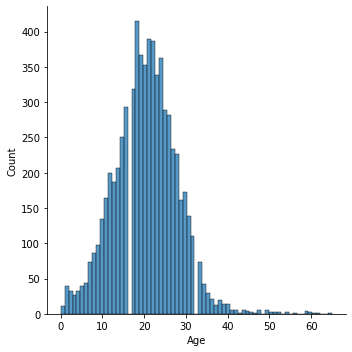

In [33]:
sns.displot(df['Age'])

c:\Users\manas\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

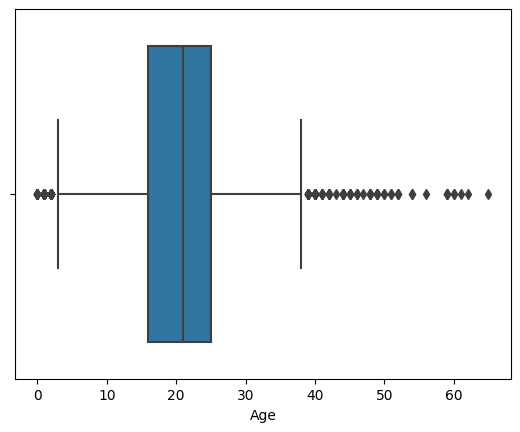

In [34]:
sns.boxplot(df['Age'])

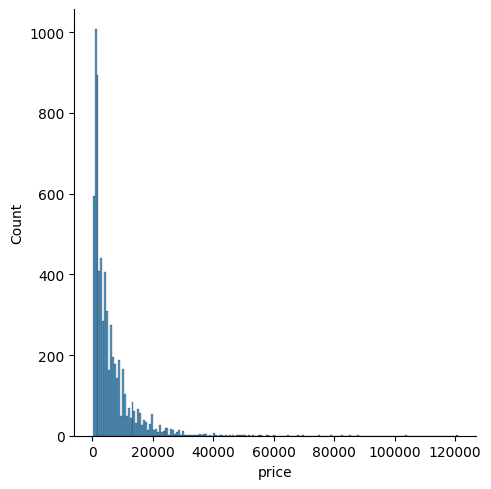

In [35]:
sns.displot(df['price'])

c:\Users\manas\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

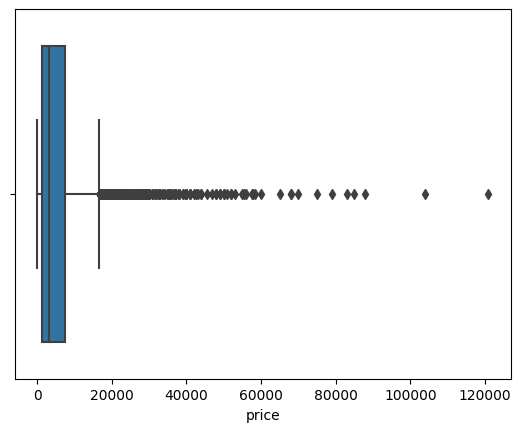

In [36]:
sns.boxplot(df['price'])

In [37]:
df.drop(columns=['seller','offerType','abtest'],axis=1,inplace=True)

In [40]:
df.columns

Index(['price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')

In [41]:
df.dropna(axis=0,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5228 entries, 1 to 49988
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                5228 non-null   int64 
 1   vehicleType          5228 non-null   object
 2   yearOfRegistration   5228 non-null   int64 
 3   gearbox              5228 non-null   object
 4   powerPS              5228 non-null   int64 
 5   model                5228 non-null   object
 6   kilometer            5228 non-null   int64 
 7   monthOfRegistration  5228 non-null   int64 
 8   fuelType             5228 non-null   object
 9   brand                5228 non-null   object
 10  notRepairedDamage    5228 non-null   object
 11  Age                  5228 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 531.0+ KB


In [43]:
df=pd.get_dummies(df,drop_first=True)

In [44]:
df.columns

Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'Age', 'vehicleType_cabrio', 'vehicleType_coupe',
       'vehicleType_limousine', 'vehicleType_others',
       ...
       'brand_seat', 'brand_skoda', 'brand_smart', 'brand_subaru',
       'brand_suzuki', 'brand_toyota', 'brand_trabant', 'brand_volkswagen',
       'brand_volvo', 'notRepairedDamage_yes'],
      dtype='object', length=281)

In [49]:
x1 = df.drop(['price'], axis='columns', inplace=False)
y1 = df['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

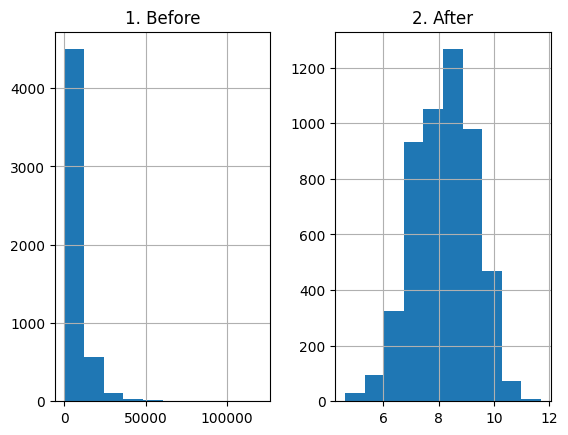

In [50]:
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

In [51]:
y1 = np.log(y1)


Spliting data into train test 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)


In [53]:
base_pred = np.mean(y_test)
print(base_pred)

8.164443077206531


In [54]:
base_pred = np.repeat(base_pred, len(y_test))


In [56]:
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error)



1.1071416008453623


In [57]:
lgr=LinearRegression(fit_intercept=True)


In [58]:
model_lin1=lgr.fit(X_train,y_train)


In [59]:
cars_predictions_lin1 = lgr.predict(X_test)


In [60]:
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5374728253642076


In [61]:
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7643287078264467 0.7860168051685126


count   1569.000
mean      -0.031
std        0.537
min       -5.685
25%       -0.268
50%        0.021
75%        0.269
max        3.828
Name: price, dtype: float64

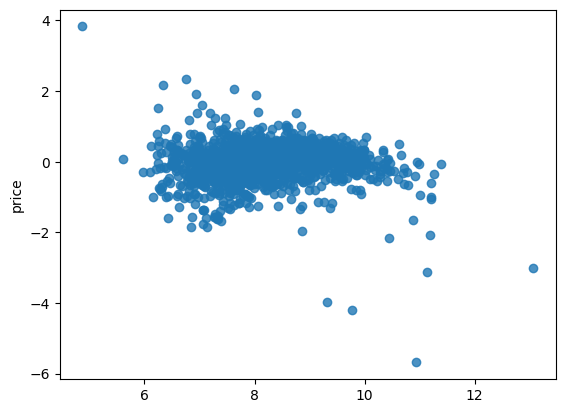

In [62]:
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, 
            fit_reg=False)
residuals1.describe()

In [65]:
rf = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

In [66]:
model_rf1=rf.fit(X_train,y_train)


c:\Users\manas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [67]:
cars_predictions_rf1 = rf.predict(X_test)


In [68]:
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4736541238580773


In [69]:
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)  

0.8169725174362167 0.8982885655965426


In [71]:
cars_imputed = df.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

# Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True) 

In [72]:
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

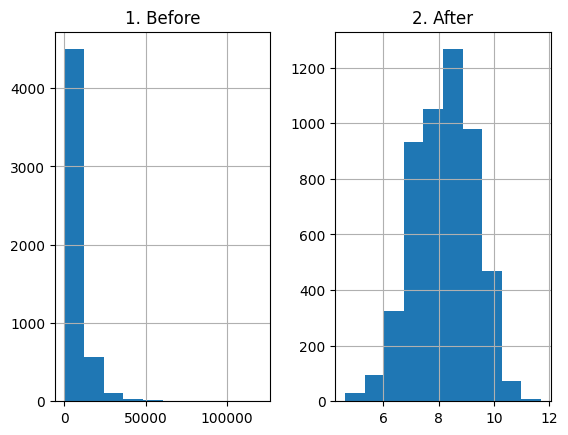

In [73]:
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

In [74]:
y2 = np.log(y2)


In [75]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)


In [77]:
base_pred = np.mean(y_test1)
print(base_pred)

8.164443077206531


In [78]:
base_pred = np.repeat(base_pred, len(y_test1))


In [79]:

base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
                               
print(base_root_mean_square_error_imputed)

1.1071416008453623


In [80]:
lgr2=LinearRegression(fit_intercept=True)


In [81]:
model_lin2=lgr2.fit(X_train1,y_train1)


In [82]:
cars_predictions_lin2 = lgr2.predict(X_test1)


In [83]:
# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

# R squared value
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.5374728253642076
0.7643287078264467 0.7860168051685126


In [84]:
rf2 = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

In [85]:
model_rf2=rf2.fit(X_train1,y_train1)


c:\Users\manas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [86]:
cars_predictions_rf2 = rf2.predict(X_test1)


In [87]:
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.4736541238580773


In [88]:
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)


0.8169725174362167 0.8982885655965426
